# Introduction
**ML model for predicting a simple curve using Keras**

* Use neural networks (single layer of perceptrons or multi-layer perceptrons) to solve a regression problem for a simple curve $y = f(x)$ (interpolation & extrapolation).
* **Input**: $x$
* **Output**: $y$
* **NOTE**: For parts annoted by  (\*\*\*), try out for yourself by uncommenting or changing the values of the variables

**By MGM and MRN, ORNL**

**Date: 2022 April 5**

**Edited:**
* 2022 Apr. 05: Initial code

# Import libraries

In [1]:
# for math
import numpy as np

# for ML (Keras - TensorFlow backend)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'    # to hide TF info messages
# # check for GPU use (***)
# import tensorflow as tf
# print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Nadam, SGD
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import model_from_json

# for plotting
import matplotlib.pyplot as plt

# Set hyperparameters
* **NOTE**: The word "parameter(s)" in ML lingo usually refers to the parameters in the ML model that are being optimized during the training process.

In [2]:
# For data generation
Ntot            = 1000   # number of total data points (***)
Ntrainper       = 0.9    # amount of training data (in %) (***)
shuffledata     = True   # randomly shuffle data or not (***)

# For neural network
n_inputs        = 1      # number of inputs
n_outputs       = 1      # number of outputs
nneurons        = 4      # number of neurons in MLP (***)
leakyReLU_alpha = 0.1    # slope (negative) of LeakyReLU activation function
nepoch          = 10     # number of epochs during training (***)
# (***)
batch_size      = 1      # mini-batch size for data during training
n_val           = 0.1    # split for validation data during training (in %)

# Saving
saveFig         = False  # save ML prediction figure (and others - edit accordingly)

# Generate data

In [3]:
def generate_data(npts=1000, train_fraction = 0.7, shuffle=True):
    
    # sine function
    x = np.random.uniform(low=0, high=2*np.pi, size=npts)
    if not shuffle: 
        x = np.sort(x)
    y = np.sin(x) 
    
    # # tanh function (***)
    # x = np.random.uniform(low=0, high=1, size=npts)
    # if not shuffle: 
    #     x = np.sort(x)
    # y = np.tanh((x-0.5)*10)
   
    split        = int(train_fraction * npts)
    xtrain, xval = x[:split], x[split:]
    ytrain, yval = y[:split], y[split:]
        
    return xtrain, ytrain, xval, yval

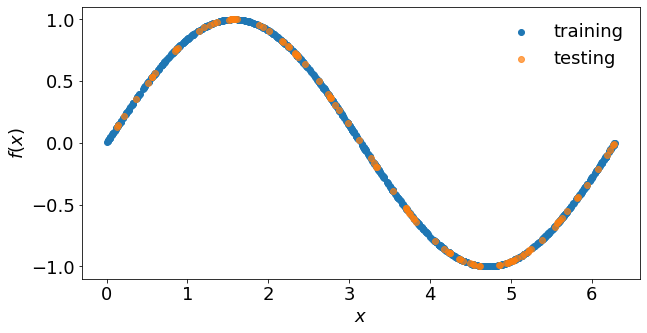

In [4]:
train_IP, train_OP, test_IP, test_OP = generate_data(Ntot, Ntrainper, shuffledata)

plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1,figsize=(10,5),facecolor="1")
axs.scatter(train_IP, train_OP, label='training')
axs.scatter(test_IP, test_OP, label='testing', alpha=0.7)
axs.set_xlabel(f'$x$'); axs.set_ylabel(f'$f(x)$')
axs.legend(frameon=False);

# Define the network

In [5]:
model = Sequential()
model.add( Dense(nneurons,input_dim=n_inputs,kernel_initializer="RandomUniform") )
model.add( LeakyReLU(alpha=leakyReLU_alpha) )

model.add( Dense(nneurons,kernel_initializer="RandomUniform") )
model.add( LeakyReLU(alpha=leakyReLU_alpha) )

# # (***)
# model.add( Dense(nneurons,kernel_initializer="RandomUniform") )
# model.add( LeakyReLU(alpha=leakyReLU_alpha) )

model.add( Dense(n_outputs,kernel_initializer="RandomUniform") )

model.compile(loss='mse', optimizer=Nadam())

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


# Train the model

In [6]:
history = model.fit(train_IP, train_OP, epochs=nepoch, batch_size=batch_size, validation_split=n_val, verbose=1)

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: 0.4230 - val_loss: 0.1742
Epoch 2/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1626 - val_loss: 0.1369
Epoch 3/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1382 - val_loss: 0.1357
Epoch 4/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1303 - val_loss: 0.1285
Epoch 5/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1285 - val_loss: 0.1338
Epoch 6/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1397 - val_loss: 0.1252
Epoch 7/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1187 - val_loss: 0.1224
Epoch 8/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1267 - val_loss: 0.1220
Epoch 9/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1328 - val_loss: 0.1198
Epoch 10/10
810/810 [==============================] - 1s 1ms/step - loss: 0.1191 - val_loss: 0.1172

# Evaluate the model & prediction

In [7]:
# evaluate the keras model
train_mse = model.evaluate(train_IP, train_OP, verbose=0)
test_mse = model.evaluate(test_IP, test_OP, verbose=0)
print('Train: %4.3e, Test: %4.3e' % (train_mse, test_mse))

Train: 1.190e-01, Test: 1.134e-01


In [8]:
# Predict output of test input
test_OP_ML = model.predict(test_IP)

# Plotting the results

## Loss during training

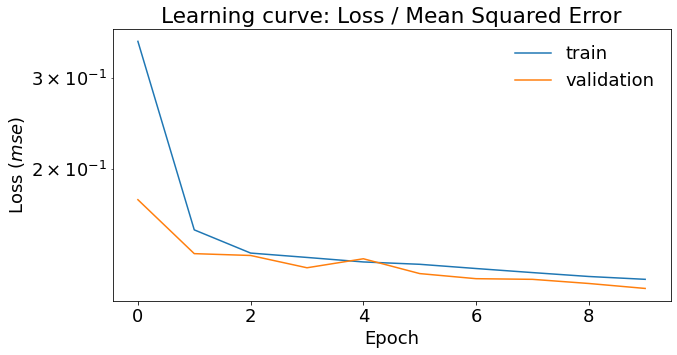

In [9]:
fig, axs = plt.subplots(1,figsize=(10,5),facecolor="1")
axs.set_title('Learning curve: Loss / Mean Squared Error')
axs.plot(history.history['loss'], label='train')
axs.plot(history.history['val_loss'], label='validation')
axs.set_xlabel('Epoch'); axs.set_ylabel(f'Loss ($mse$)')
axs.set_yscale('log')
axs.legend(frameon=False);

## ML prediction of testing data

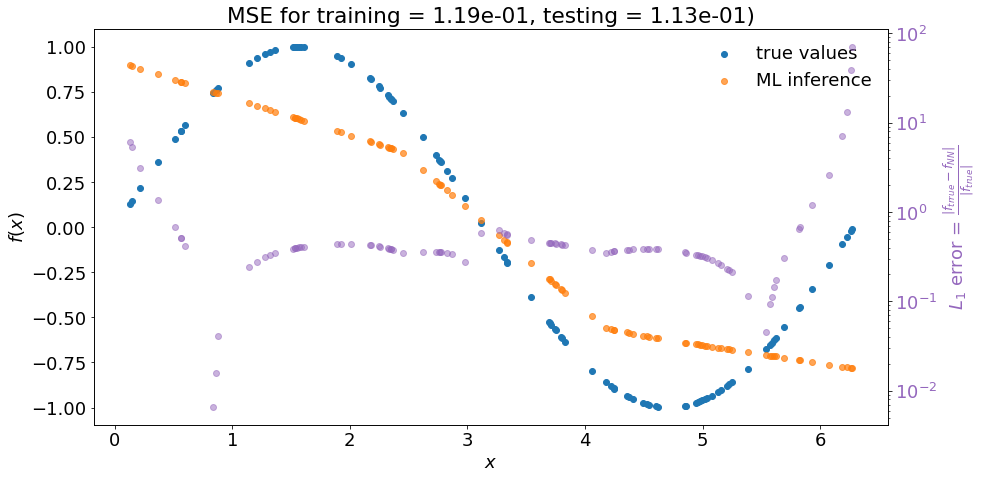

In [10]:
fig, axs = plt.subplots(1,figsize=(14,7),facecolor="1")
axs.set_title(f'MSE for training = {train_mse:0.2e}, testing = {test_mse:0.2e})');
# axs.scatter(train_IP, train_OP, label='training')
axs.scatter(test_IP, test_OP, label='true values')
axs.scatter(test_IP, test_OP_ML, label='ML inference', alpha=0.7)
axs.set_xlabel(f'$x$'); axs.set_ylabel(f'$f(x)$');
axs.legend(frameon=False, loc='best');

# plot L1 error
color = 'tab:purple'
ax2 = axs.twinx()  # initiate a second axis that shares the same x-axis
ax2.scatter(test_IP, np.abs(test_OP[:]-test_OP_ML.reshape(-1)) / (np.abs(test_OP)+1e-15), color=color, alpha=0.5)
ax2.set_ylabel(r'$L_1$ error = $\frac{\|f_{trrue} - f_{NN}\|}{\|f_{true}\|}$', color=color);
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log');

fig.tight_layout()  # otherwise the right y-label is slightly clipped
if saveFig: plt.savefig(f'Figs/ML_prediction_L1error.png', bbox_inches='tight', dpi=100);